# Підготовка та Аналіз даних

## Лабораторна робота No4

### Структури для роботи з великими обсягами даних в Python

### Мета: отримати навички роботи із структурами для зберігання в Python
### (python, numpy, pandas, numpy array, dataframe, timeit)

In [1]:
import pandas as pd
import numpy as np
import time
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import pearsonr, spearmanr
from sklearn.preprocessing import OneHotEncoder
print("Setup complete")

Setup complete


Перший рівень (спрощені завдання)

In [2]:
def CreateDataFrame(filepath):
    headers = ["Date", "Time", "Global_active_power", "Global_reactive_power", "Voltage", "Global_intensity",
              "Sub_metering_1", "Sub_metering_2", "Sub_metering_3"]
    df = pd.read_csv(filepath, header=1, sep=";", names=headers, low_memory=False, na_values="?")
    df['Datetime'] = pd.to_datetime(df['Date'] + ' ' + df['Time'], dayfirst=True)
    df = df.dropna()
    df = df.drop(['Time', 'Date'], axis=1)
    return df
df = CreateDataFrame("household_power_consumption.txt")
df

,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3,Datetime
0,5.360,0.436,233.63,23.0,0.0,1.0,16.0,2006-12-16 17:25:00
1,5.374,0.498,233.29,23.0,0.0,2.0,17.0,2006-12-16 17:26:00
2,5.388,0.502,233.74,23.0,0.0,1.0,17.0,2006-12-16 17:27:00
3,3.666,0.528,235.68,15.8,0.0,1.0,17.0,2006-12-16 17:28:00
4,3.520,0.522,235.02,15.0,0.0,2.0,17.0,2006-12-16 17:29:00
...,...,...,...,...,...,...,...,...
2075253,0.946,0.000,240.43,4.0,0.0,0.0,0.0,2010-11-26 20:58:00
2075254,0.944,0.000,240.00,4.0,0.0,0.0,0.0,2010-11-26 20:59:00
2075255,0.938,0.000,239.82,3.8,0.0,0.0,0.0,2010-11-26 21:00:00
2075256,0.934,0.000,239.70,3.8,0.0,0.0,0.0,2010-11-26 21:01:00


In [3]:
def CreateNP(filepath):
    dtypes = [
        ('Date', 'U10'), ('Time', 'U8'),
        ('Global_active_power', 'f8'), ('Global_reactive_power', 'f8'),
        ('Voltage', 'f8'), ('Global_intensity', 'f8'),
        ('Sub_metering_1', 'f8'), ('Sub_metering_2', 'f8'), ('Sub_metering_3', 'f8')
    ]
    data = np.genfromtxt(filepath, delimiter=';', names=True, dtype=dtypes, encoding=None)
    data = data.transpose()
    nan_mask = np.isnan(data['Sub_metering_1']) | np.isnan(data['Sub_metering_2']) | np.isnan(data['Sub_metering_3'])
    data = data[~nan_mask]
    return data

data = CreateNP("household_power_consumption.txt")
data

array([('16/12/2006', '17:24:00', 4.216, 0.418, 234.84, 18.4, 0., 1., 17.),
       ('16/12/2006', '17:25:00', 5.36 , 0.436, 233.63, 23. , 0., 1., 16.),
       ('16/12/2006', '17:26:00', 5.374, 0.498, 233.29, 23. , 0., 2., 17.),
       ...,
       ('26/11/2010', '21:00:00', 0.938, 0.   , 239.82,  3.8, 0., 0.,  0.),
       ('26/11/2010', '21:01:00', 0.934, 0.   , 239.7 ,  3.8, 0., 0.,  0.),
       ('26/11/2010', '21:02:00', 0.932, 0.   , 239.55,  3.8, 0., 0.,  0.)],
      dtype=[('Date', '<U10'), ('Time', '<U8'), ('Global_active_power', '<f8'), ('Global_reactive_power', '<f8'), ('Voltage', '<f8'), ('Global_intensity', '<f8'), ('Sub_metering_1', '<f8'), ('Sub_metering_2', '<f8'), ('Sub_metering_3', '<f8')])

Завдання першого рівня

1. Обрати всі записи, у яких загальна активна споживана потужність
перевищує 5 кВт.

In [4]:
def Active_Power(df):
    active = df[df["Global_active_power"] > 5]
    return active
start_time = time.time()
active = Active_Power(df)
end_time = time.time() - start_time
print(f"Час: {end_time}")
active

Час: 0.007002353668212891


,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3,Datetime
0,5.360,0.436,233.63,23.0,0.0,1.0,16.0,2006-12-16 17:25:00
1,5.374,0.498,233.29,23.0,0.0,2.0,17.0,2006-12-16 17:26:00
2,5.388,0.502,233.74,23.0,0.0,1.0,17.0,2006-12-16 17:27:00
10,5.412,0.470,232.78,23.2,0.0,1.0,17.0,2006-12-16 17:35:00
11,5.224,0.478,232.99,22.4,0.0,1.0,16.0,2006-12-16 17:36:00
...,...,...,...,...,...,...,...,...
2069355,5.408,0.150,231.50,23.6,48.0,0.0,0.0,2010-11-22 18:40:00
2069356,5.528,0.144,232.48,24.6,53.0,0.0,0.0,2010-11-22 18:41:00
2071585,5.172,0.050,235.18,22.0,0.0,38.0,17.0,2010-11-24 07:50:00
2071586,5.750,0.000,234.40,24.6,0.0,39.0,17.0,2010-11-24 07:51:00


In [5]:
def Active_Power_np(data):
    mask = data['Global_active_power'] > 5
    active = data[mask]
    return active
start_time = time.time()
activenp = Active_Power_np(data)
end_time = time.time() - start_time
print(f"Час: {end_time}")
activenp

Час: 0.01700282096862793


array([('16/12/2006', '17:25:00', 5.36 , 0.436, 233.63, 23. , 0.,  1., 16.),
       ('16/12/2006', '17:26:00', 5.374, 0.498, 233.29, 23. , 0.,  2., 17.),
       ('16/12/2006', '17:27:00', 5.388, 0.502, 233.74, 23. , 0.,  1., 17.),
       ...,
       ('24/11/2010', '07:50:00', 5.172, 0.05 , 235.18, 22. , 0., 38., 17.),
       ('24/11/2010', '07:51:00', 5.75 , 0.   , 234.4 , 24.6, 0., 39., 17.),
       ('25/11/2010', '07:21:00', 5.074, 0.24 , 238.55, 21.4, 1.,  2., 18.)],
      dtype=[('Date', '<U10'), ('Time', '<U8'), ('Global_active_power', '<f8'), ('Global_reactive_power', '<f8'), ('Voltage', '<f8'), ('Global_intensity', '<f8'), ('Sub_metering_1', '<f8'), ('Sub_metering_2', '<f8'), ('Sub_metering_3', '<f8')])

2. Обрати всі записи, у яких вольтаж перевищую 235 В.

In [6]:
def Volt(df):
    volt = df[df["Voltage"] > 235]
    return volt
start_time = time.time()
volt = Volt(df)
end_time = time.time() - start_time
print(f"Час: {end_time}")
volt

Час: 0.09203100204467773


,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3,Datetime
3,3.666,0.528,235.68,15.8,0.0,1.0,17.0,2006-12-16 17:28:00
4,3.520,0.522,235.02,15.0,0.0,2.0,17.0,2006-12-16 17:29:00
5,3.702,0.520,235.09,15.8,0.0,1.0,17.0,2006-12-16 17:30:00
6,3.700,0.520,235.22,15.8,0.0,1.0,17.0,2006-12-16 17:31:00
13,4.054,0.422,235.24,17.6,0.0,1.0,17.0,2006-12-16 17:38:00
...,...,...,...,...,...,...,...,...
2075253,0.946,0.000,240.43,4.0,0.0,0.0,0.0,2010-11-26 20:58:00
2075254,0.944,0.000,240.00,4.0,0.0,0.0,0.0,2010-11-26 20:59:00
2075255,0.938,0.000,239.82,3.8,0.0,0.0,0.0,2010-11-26 21:00:00
2075256,0.934,0.000,239.70,3.8,0.0,0.0,0.0,2010-11-26 21:01:00


In [7]:
def Voltnp(data):
    mask = data["Voltage"] > 235
    volt = data[mask]
    return volt
start_time = time.time()
volt = Voltnp(data)
end_time = time.time() - start_time
print(f"Час: {end_time}")
volt

Час: 0.17004823684692383


array([('16/12/2006', '17:28:00', 3.666, 0.528, 235.68, 15.8, 0., 1., 17.),
       ('16/12/2006', '17:29:00', 3.52 , 0.522, 235.02, 15. , 0., 2., 17.),
       ('16/12/2006', '17:30:00', 3.702, 0.52 , 235.09, 15.8, 0., 1., 17.),
       ...,
       ('26/11/2010', '21:00:00', 0.938, 0.   , 239.82,  3.8, 0., 0.,  0.),
       ('26/11/2010', '21:01:00', 0.934, 0.   , 239.7 ,  3.8, 0., 0.,  0.),
       ('26/11/2010', '21:02:00', 0.932, 0.   , 239.55,  3.8, 0., 0.,  0.)],
      dtype=[('Date', '<U10'), ('Time', '<U8'), ('Global_active_power', '<f8'), ('Global_reactive_power', '<f8'), ('Voltage', '<f8'), ('Global_intensity', '<f8'), ('Sub_metering_1', '<f8'), ('Sub_metering_2', '<f8'), ('Sub_metering_3', '<f8')])

3. Обрати всі записи, у яких сила струму лежить в межах 19-20 А,
для них виявити ті, у яких пральна машина та холодильних
споживають більше, ніж бойлер та кондиціонер.

In [8]:
def Amper(df):
    amper = df[df["Global_intensity"].between(19,20) & df["Sub_metering_2"] > df["Sub_metering_3"]]
    return amper
start_time = time.time()
amper = Amper(df)
end_time = time.time() - start_time
print(f"Час: {end_time}")
amper

Час: 0.020128250122070312


,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3,Datetime
459,4.582,0.258,238.08,19.6,0.0,13.0,0.0,2006-12-17 01:04:00
463,4.618,0.104,239.61,19.6,0.0,27.0,0.0,2006-12-17 01:08:00
474,4.636,0.140,237.37,19.4,0.0,36.0,0.0,2006-12-17 01:19:00
475,4.634,0.152,237.17,19.4,0.0,35.0,0.0,2006-12-17 01:20:00
476,4.652,0.142,237.92,19.4,0.0,36.0,0.0,2006-12-17 01:21:00
...,...,...,...,...,...,...,...,...
2043446,4.478,0.252,237.20,19.0,47.0,2.0,0.0,2010-11-04 18:51:00
2043593,4.576,0.348,240.99,19.0,46.0,1.0,0.0,2010-11-04 21:18:00
2053330,4.694,0.000,234.69,20.0,37.0,24.0,0.0,2010-11-11 15:35:00
2069428,4.550,0.254,232.52,19.6,36.0,1.0,0.0,2010-11-22 19:53:00


In [9]:
def Ampernp(data):
    cond1 = np.logical_and(data['Global_intensity'] >= 19, data['Global_intensity'] <= 20)
    cond2 = data['Sub_metering_2'] > data['Sub_metering_3']
    filtered_data = data[np.logical_and(cond1, cond2)]

    return filtered_data
start_time = time.time()
amper = Ampernp(data)
end_time = time.time() - start_time
print(f"Час: {end_time}")
amper

Час: 0.033017635345458984


array([('16/12/2006', '18:09:00', 4.464, 0.136, 234.66, 19. , 0., 37., 16.),
       ('17/12/2006', '01:04:00', 4.582, 0.258, 238.08, 19.6, 0., 13.,  0.),
       ('17/12/2006', '01:08:00', 4.618, 0.104, 239.61, 19.6, 0., 27.,  0.),
       ...,
       ('24/11/2010', '07:55:00', 4.602, 0.   , 237.08, 19.4, 0., 40., 17.),
       ('24/11/2010', '07:56:00', 4.536, 0.   , 237.03, 19. , 0., 39., 17.),
       ('24/11/2010', '07:57:00', 4.626, 0.   , 236.78, 19.4, 0., 39., 17.)],
      dtype=[('Date', '<U10'), ('Time', '<U8'), ('Global_active_power', '<f8'), ('Global_reactive_power', '<f8'), ('Voltage', '<f8'), ('Global_intensity', '<f8'), ('Sub_metering_1', '<f8'), ('Sub_metering_2', '<f8'), ('Sub_metering_3', '<f8')])

4. Обрати випадковим чином 500000 записів (без повторів елементів
вибірки), для них обчислити середні величини усіх 3-х груп
споживання електричної енергії

In [10]:
def randomhouse(df):
    random_sample = df.sample(n=500000, replace=False)
    mean_sub_metering_1 = random_sample['Sub_metering_1'].mean()
    mean_sub_metering_2 = random_sample['Sub_metering_2'].mean()
    mean_sub_metering_3 = random_sample['Sub_metering_3'].mean()
    print("Середнє значення Sub_metering_1:", mean_sub_metering_1)
    print("Середнє значення Sub_metering_2:", mean_sub_metering_2)
    print("Середнє значення Sub_metering_3:", mean_sub_metering_3)
    return random_sample
start_time = time.time()
house = randomhouse(df)
end_time = time.time() - start_time
print(f"Час: {end_time}")
house

Середнє значення Sub_metering_1: 1.135572
Середнє значення Sub_metering_2: 1.299612
Середнє значення Sub_metering_3: 6.45855
Час: 0.14203357696533203


,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3,Datetime
236404,2.348,0.242,234.60,10.6,0.0,21.0,0.0,2007-05-29 21:29:00
1433168,0.324,0.266,246.48,1.6,0.0,2.0,0.0,2009-09-06 23:33:00
109097,0.292,0.096,241.54,1.2,0.0,0.0,0.0,2007-03-02 11:42:00
466685,2.882,0.052,232.21,12.4,0.0,0.0,17.0,2007-11-05 19:30:00
590959,0.504,0.206,242.45,2.4,0.0,0.0,0.0,2008-01-31 02:44:00
...,...,...,...,...,...,...,...,...
1905757,0.156,0.000,240.58,0.6,0.0,0.0,1.0,2010-08-01 04:02:00
1560599,0.734,0.118,242.74,3.2,0.0,0.0,1.0,2009-12-04 11:24:00
1460347,0.978,0.340,237.45,4.4,0.0,1.0,1.0,2009-09-25 20:32:00
1130668,0.524,0.000,243.26,2.2,0.0,0.0,0.0,2009-02-08 21:53:00


In [11]:
def randomhousenp(data):
    sampled_indices_np = np.random.choice(len(data), 500000, replace=False)
    sampled_np = data[sampled_indices_np]
    mean_sub_metering_1 = sampled_np['Sub_metering_1'].mean()
    mean_sub_metering_2 = sampled_np['Sub_metering_2'].mean()
    mean_sub_metering_3 = sampled_np['Sub_metering_3'].mean()
    print("Середнє значення Sub_metering_1:", mean_sub_metering_1)
    print("Середнє значення Sub_metering_2:", mean_sub_metering_2)
    print("Середнє значення Sub_metering_3:", mean_sub_metering_3)
    return sampled_np
start_time = time.time()
samples = randomhousenp(data)
end_time = time.time() - start_time
print(f"Час: {end_time}")
samples

Середнє значення Sub_metering_1: 1.116314
Середнє значення Sub_metering_2: 1.313512
Середнє значення Sub_metering_3: 6.478622
Час: 0.17004084587097168


array([('20/11/2009', '11:29:00', 1.812, 0.   , 241.12, 7.4, 0., 0., 18.),
       ('1/5/2008', '05:38:00', 0.414, 0.234, 241.43, 2. , 0., 1.,  1.),
       ('3/4/2008', '01:22:00', 0.214, 0.   , 238.48, 0.8, 0., 0.,  0.),
       ...,
       ('16/9/2008', '06:05:00', 0.286, 0.112, 241.59, 1.2, 0., 0.,  1.),
       ('8/6/2009', '15:09:00', 0.32 , 0.08 , 241.66, 1.4, 0., 0.,  1.),
       ('15/12/2009', '11:23:00', 1.576, 0.1  , 245.36, 6.4, 0., 1., 19.)],
      dtype=[('Date', '<U10'), ('Time', '<U8'), ('Global_active_power', '<f8'), ('Global_reactive_power', '<f8'), ('Voltage', '<f8'), ('Global_intensity', '<f8'), ('Sub_metering_1', '<f8'), ('Sub_metering_2', '<f8'), ('Sub_metering_3', '<f8')])

5. Обрати ті записи, які після 18-00 споживають понад 6 кВт за
хвилину в середньому, серед відібраних визначити ті, у яких
основне споживання електроенергії у вказаний проміжок часу
припадає на пральну машину, сушарку, холодильник та освітлення
(група 2 є найбільшою), а потім обрати кожен третій результат із
першої половини та кожен четвертий результат із другої половини.

In [12]:
def Evening(df):
    selected_households = df[(df['Datetime'].dt.hour > 18) & (df['Global_active_power'] > 6)]
    group2 = selected_households[(selected_households["Sub_metering_1"] < selected_households["Sub_metering_2"]) 
                                 & (selected_households["Sub_metering_3"] < selected_households["Sub_metering_2"])]
    first_half_len = len(group2) // 2
    result_first_half = group2.iloc[::3, :] 
    result_second_half = group2.iloc[first_half_len::4, :]
    final_result = pd.concat([result_first_half, result_second_half])
    return final_result
start_time = time.time()
evening = Evening(df)
end_time = time.time() - start_time
print(f"Час: {end_time}")
evening

Час: 0.09003019332885742


,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3,Datetime
3006,6.158,0.442,229.08,27.0,0.0,36.0,0.0,2006-12-18 19:31:00
17496,7.062,0.270,235.76,30.2,2.0,65.0,17.0,2006-12-28 21:01:00
17499,7.376,0.238,234.67,31.4,1.0,72.0,17.0,2006-12-28 21:04:00
17502,7.248,0.000,235.34,30.8,1.0,72.0,17.0,2006-12-28 21:07:00
17505,7.160,0.000,235.49,30.4,1.0,73.0,18.0,2006-12-28 21:10:00
...,...,...,...,...,...,...,...,...
1677877,6.502,0.072,233.81,27.8,0.0,73.0,18.0,2010-02-23 22:02:00
1775624,6.702,0.048,232.67,29.2,13.0,71.0,18.0,2010-05-02 19:09:00
1775628,6.398,0.054,234.28,27.4,27.0,73.0,0.0,2010-05-02 19:13:00
1775632,6.412,0.184,232.29,27.6,26.0,72.0,1.0,2010-05-02 19:17:00


In [13]:
def Eveningnp(data):
    hours = np.array([int(time.split(':')[0]) for time in data["Time"]])
    filtered_data = data[(hours > 18) & (data['Global_active_power'] > 6)]
    filtered_data2 = filtered_data[
        (filtered_data["Sub_metering_1"] < filtered_data["Sub_metering_2"]) &
        (filtered_data["Sub_metering_3"] < filtered_data["Sub_metering_2"])]
    first_half_len = filtered_data2[:len(filtered_data2) // 2]
    second_half_len = filtered_data2[len(filtered_data2) // 2:]
    final_result = np.concatenate([first_half_len[::3], second_half_len[::4]])
    return final_result
start_time = time.time()
eve = Eveningnp(data)
end_time = time.time() - start_time
print(f"Час: {end_time}")
eve

Час: 1.4627275466918945


array([('18/12/2006', '19:31:00',  6.158, 0.442, 229.08, 27. ,  0., 36.,  0.),
       ('28/12/2006', '21:01:00',  7.062, 0.27 , 235.76, 30.2,  2., 65., 17.),
       ('28/12/2006', '21:04:00',  7.376, 0.238, 234.67, 31.4,  1., 72., 17.),
       ('28/12/2006', '21:07:00',  7.248, 0.   , 235.34, 30.8,  1., 72., 17.),
       ('28/12/2006', '21:10:00',  7.16 , 0.   , 235.49, 30.4,  1., 73., 18.),
       ('28/12/2006', '21:13:00',  9.132, 0.084, 231.27, 39.4, 36., 71., 16.),
       ('28/12/2006', '21:16:00',  8.046, 0.114, 231.77, 35. , 36., 52., 16.),
       ('28/12/2006', '21:21:00',  7.124, 0.148, 234.33, 30.4, 37., 38., 17.),
       ('29/12/2006', '21:18:00',  6.15 , 0.118, 230.77, 26.6,  0., 70.,  0.),
       ('29/12/2006', '21:21:00',  6.412, 0.136, 230.49, 27.8,  0., 70.,  0.),
       ('29/12/2006', '21:24:00',  6.15 , 0.   , 230.71, 26.6,  0., 70.,  0.),
       ('29/12/2006', '21:28:00',  6.692, 0.   , 228.77, 29.2,  0., 69., 17.),
       ('29/12/2006', '22:27:00',  6.976, 0.376, 235

# Другий рівень (ускладнений)
# https://archive.ics.uci.edu/dataset/38/echocardiogram

## Завдання другого рівня

1. Поборотися із зниклими даними. Для цього подивитись https://archive.ics.uci.edu/dataset/56/labor+relations

In [14]:
def CreateDataFrame(filepath):
    headers = ["dur", "wage1.wage", "wage2.wage", "wage3.wage",
               "cola", "hours.hrs", "pension", "stby_pay", "shift_diff",
               "educ_allw", "holidays", "vacation", "lngtrm_disabil",
               "dntl_ins", "bereavement.boolean", "empl_hplan", "label"]
    
    df = pd.read_csv(filepath, header=None, sep=",", names=headers, on_bad_lines='skip', na_values="?")
    df.drop(columns=['wage2.wage', 'pension', 'hours.hrs', 'shift_diff', 'vacation'], inplace=True)
    df = df[df['dur'].notna()]
    for col in ['wage1.wage', 'stby_pay', 'educ_allw']:
        df[col] = pd.to_numeric(df[col], errors='coerce')
        df[col] = df[col].fillna(df[col].mean())
    if df['cola'].dtype in ['float64', 'int64']:
        df['cola'] = df['cola'].fillna(df['cola'].mean())
    cat_columns = ['holidays', 'lngtrm_disabil', 'dntl_ins', 'bereavement.boolean',
                   'wage3.wage', 'cola', 'educ_allw', 'empl_hplan']
    for col in cat_columns:
        if df[col].isna().sum() > 0:
            freqs = df[col].value_counts(normalize=True, dropna=True)
            if freqs.empty:
                df.drop(columns=[col], inplace=True)
            else:
                df[col] = df[col].apply(
                    lambda x: np.random.choice(freqs.index, p=freqs.values) if pd.isna(x) else x
                )
    return df


start_time = time.time()
df = CreateDataFrame("C:/Users/ender/PycharmProjects/pythonProject/DataScienceAssigments/lab4/te/C4.5/labor-neg.data")
print(f"Час: {time.time() - start_time:} сек")
df


Час: 0.01900339126586914 сек


,dur,wage1.wage,wage3.wage,cola,stby_pay,holidays,lngtrm_disabil,dntl_ins,bereavement.boolean,empl_hplan,label
0,1.0,5.0,2.0,none,6.142857,11.0,yes,half,yes,half,good
1,2.0,4.5,2.0,none,6.142857,11.0,no,full,yes,full,good
3,3.0,3.7,5.0,tc,6.142857,9.0,yes,half,yes,none,good
4,3.0,4.5,5.0,none,6.142857,12.0,yes,half,yes,half,good
5,2.0,2.0,4.6,none,6.142857,12.0,yes,full,no,none,good
6,3.0,4.0,5.0,tc,6.142857,12.0,yes,none,yes,half,good
7,3.0,6.9,2.3,none,6.142857,12.0,no,half,yes,none,good
8,2.0,3.0,5.0,none,12.000000,11.0,yes,half,yes,none,good
9,1.0,5.7,5.0,none,6.142857,11.0,yes,full,yes,none,good
10,3.0,3.5,4.6,none,6.142857,13.0,yes,half,yes,full,good


In [28]:
def CreateDataFrame_numpy(filepath):
    num_columns = 17
    with open(filepath, "r", encoding="utf-8") as f:
        rows = [line.strip().split(",") for line in f]
    clean_rows = [r[:num_columns] for r in rows if len(r) >= num_columns]
    data = np.array(clean_rows, dtype=object)
    headers = ["dur", "wage1.wage", "wage2.wage", "wage3.wage",
               "cola", "hours.hrs", "pension", "stby_pay", "shift_diff",
               "educ_allw", "holidays", "vacation", "lngtrm_disabil",
               "dntl_ins", "bereavement.boolean", "empl_hplan", "label"]
    cols_to_remove = ["wage2.wage", "pension", "educ_allw","hours.hrs", "shift_diff", "vacation"]
    indices_to_remove = [headers.index(col) for col in cols_to_remove]
    data = np.delete(data, indices_to_remove, axis=1)
    headers = [h for i, h in enumerate(headers) if i not in indices_to_remove]
    numeric_names = ["dur", "wage1.wage", "wage3.wage", "cola", "stby_pay"]
    numeric_indices = [headers.index(name) for name in numeric_names]
    for i in numeric_indices:
        col = data[:, i]
        numeric_col = []
        for val in col:
            try:
                numeric_col.append(float(val))
            except:
                numeric_col.append(np.nan)
        numeric_col = np.array(numeric_col)
        if np.all(np.isnan(numeric_col)):
            mean_val = 0.0
        else:
            mean_val = np.nanmean(numeric_col)
        
        numeric_col = np.where(np.isnan(numeric_col), mean_val, numeric_col)
        data[:, i] = numeric_col

    cat_names = [h for h in headers if h not in numeric_names]
    cat_indices = [headers.index(name) for name in cat_names]
    for i in cat_indices:
        col = data[:, i]
        known = col[col != "?"]
        if len(known) == 0:
            continue
        values, counts = np.unique(known, return_counts=True)
        probs = counts / counts.sum()
        fill_count = np.sum(col == "?")
        col[col == "?"] = np.random.choice(values, size=fill_count, p=probs)
        data[:, i] = col

    return data, headers

start_time = time.time()
data, headers = CreateDataFrame_numpy("C:/Users/ender/PycharmProjects/pythonProject/DataScienceAssigments/lab4/te/C4.5/labor-neg.data")
print(f"Час: {time.time() - start_time:} сек")
data

Час: 0.0019991397857666016 сек


array([[1.0, 5.0, 3.766666666666667, 0.0, 6.142857142857143, '11', 'yes',
        'half', 'yes', 'full', 'good'],
       [2.0, 4.5, 3.766666666666667, 0.0, 6.142857142857143, '11', 'yes',
        'full', 'yes', 'full', 'good'],
       [2.1025641025641026, 3.62051282051282, 3.766666666666667, 0.0,
        6.142857142857143, '11', 'yes', 'half', 'yes', 'half', 'good'],
       [3.0, 3.7, 5.0, 0.0, 6.142857142857143, '11', 'no', 'none', 'yes',
        'full', 'good'],
       [3.0, 4.5, 5.0, 0.0, 6.142857142857143, '12', 'yes', 'half',
        'yes', 'half', 'good'],
       [2.0, 2.0, 3.766666666666667, 0.0, 6.142857142857143, '12', 'yes',
        'none', 'yes', 'full', 'good'],
       [3.0, 4.0, 5.0, 0.0, 6.142857142857143, '12', 'yes', 'none',
        'yes', 'half', 'good'],
       [3.0, 6.9, 2.3, 0.0, 6.142857142857143, '12', 'no', 'half', 'no',
        'none', 'good'],
       [2.0, 3.0, 3.766666666666667, 0.0, 12.0, '11', 'yes', 'half',
        'yes', 'full', 'good'],
       [1.0, 5.7, 

2. Пронормувати вибраний датасет або стандартизувати його
(нормування і стандартизація мають бути реалізовані як окремі функції без застосування додаткових бібліотек, як наприклад
sklearn.preprocessing).

In [16]:
def normalize_df(df):
    df_norm = df.copy()
    for col in df_norm.select_dtypes(include=['float64', 'int64']):
        min_val = df_norm[col].min()
        max_val = df_norm[col].max()
        if min_val != max_val:
            df_norm[col] = (df_norm[col] - min_val) / (max_val - min_val)
    return df_norm
start_time = time.time()
df = normalize_df(df)
end_time = time.time() - start_time
print(f"Час: {end_time}")
df

Час: 0.004000186920166016


,dur,wage1.wage,wage3.wage,cola,stby_pay,holidays,lngtrm_disabil,dntl_ins,bereavement.boolean,empl_hplan,label
0,0.0,0.612245,0.000000,none,0.376623,0.333333,yes,half,yes,half,good
1,0.5,0.510204,0.000000,none,0.376623,0.333333,no,full,yes,full,good
3,1.0,0.346939,0.967742,tc,0.376623,0.000000,yes,half,yes,none,good
4,1.0,0.510204,0.967742,none,0.376623,0.500000,yes,half,yes,half,good
5,0.5,0.000000,0.838710,none,0.376623,0.500000,yes,full,no,none,good
6,1.0,0.408163,0.967742,tc,0.376623,0.500000,yes,none,yes,half,good
7,1.0,1.000000,0.096774,none,0.376623,0.500000,no,half,yes,none,good
8,0.5,0.204082,0.967742,none,0.909091,0.333333,yes,half,yes,none,good
9,0.0,0.755102,0.967742,none,0.376623,0.333333,yes,full,yes,none,good
10,1.0,0.306122,0.838710,none,0.376623,0.666667,yes,half,yes,full,good


In [49]:
def normalize_numpy(data):
    data_norm = data.copy()
    num_cols = data.shape[1]
    for i in range(num_cols):
        try:
            col = data_norm[:, i].astype(float)
            min_val = np.min(col)
            max_val = np.max(col)
            if min_val != max_val:
                col_norm = (col - min_val) / (max_val - min_val)
                data_norm[:, i] = col_norm
        except:
            continue
    return data_norm

start_time = time.time()
data = normalize_numpy(data)
print(f"Час: {time.time() - start_time:} сек")
data

Час: 0.0 сек


array([[0.0, 0.6122448979591836, 0.5698924731182797, 0.0,
        0.37662337662337664, 0.3333333333333333, 'yes', 'half', 'yes',
        'full', 'good'],
       [0.5, 0.5102040816326531, 0.5698924731182797, 0.0,
        0.37662337662337664, 0.3333333333333333, 'yes', 'full', 'yes',
        'full', 'good'],
       [0.5512820512820513, 0.33071690214547345, 0.5698924731182797, 0.0,
        0.37662337662337664, 0.3333333333333333, 'yes', 'half', 'yes',
        'half', 'good'],
       [1.0, 0.3469387755102041, 0.9677419354838711, 0.0,
        0.37662337662337664, 0.3333333333333333, 'no', 'none', 'yes',
        'full', 'good'],
       [1.0, 0.5102040816326531, 0.9677419354838711, 0.0,
        0.37662337662337664, 0.5, 'yes', 'half', 'yes', 'half', 'good'],
       [0.5, 0.0, 0.5698924731182797, 0.0, 0.37662337662337664, 0.5,
        'yes', 'none', 'yes', 'full', 'good'],
       [1.0, 0.4081632653061224, 0.9677419354838711, 0.0,
        0.37662337662337664, 0.5, 'yes', 'none', 'yes', 'half', 

3. Збудувати гістограму по одному із атрибутів, що буде показувати на
кількість елементів, що знаходяться у 10 діапазонах, які ви задасте.

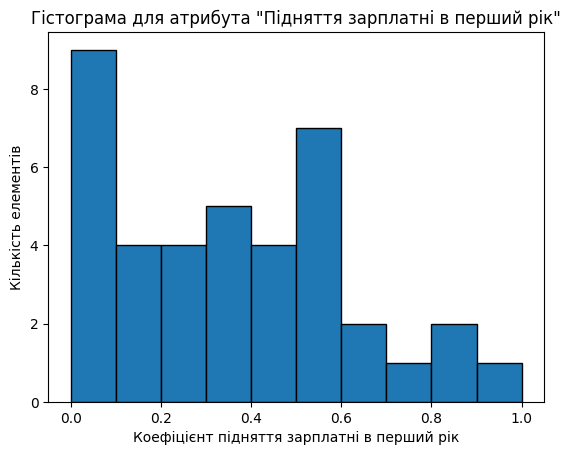

In [18]:
bins = np.linspace(df['wage1.wage'].min(), df['wage1.wage'].max(), 11)
plt.hist(df['wage1.wage'], bins=bins, edgecolor='black')
plt.title('Гістограма для атрибута "Підняття зарплатні в перший рік"')
plt.xlabel('Коефіцієнт підняття зарплатні в перший рік')
plt.ylabel('Кількість елементів')
plt.show()

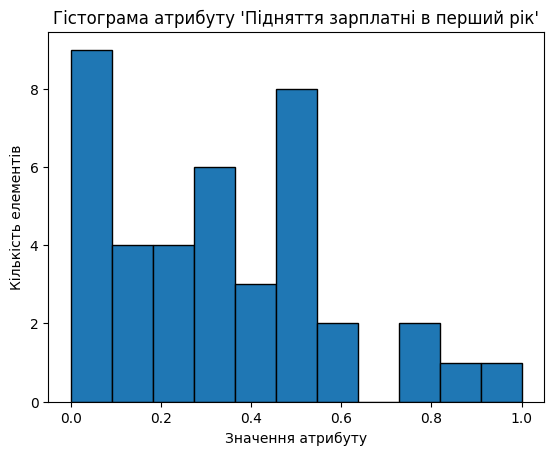

In [19]:
col_index = headers.index("wage1.wage")
values = data[:, col_index].astype(float)
bins = np.linspace(np.min(values), np.max(values), 12)
plt.hist(values, bins=bins, edgecolor="black")
plt.title("Гістограма атрибуту 'Підняття зарплатні в перший рік'")
plt.xlabel("Значення атрибуту")
plt.ylabel("Кількість елементів")
plt.show()

4. Збудувати графік залежності одного integer/real атрибута від іншого.

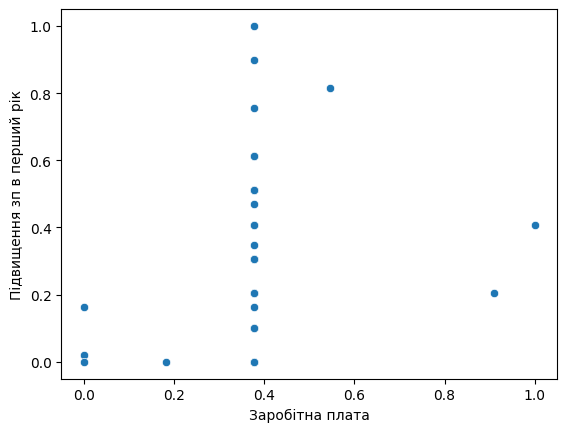

In [20]:
sns.scatterplot(x=df['stby_pay'], y=df["wage1.wage"])
plt.xlabel('Заробітна плата')
plt.ylabel('Підвищення зп в перший рік')
plt.show()

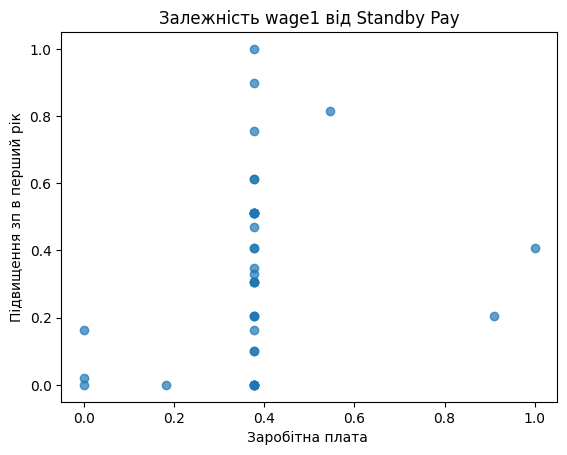

In [21]:
x_index = headers.index("stby_pay")
y_index = headers.index("wage1.wage")

x = data[:, x_index].astype(float)
y = data[:, y_index].astype(float)
plt.scatter(x, y, alpha=0.7)
plt.xlabel('Заробітна плата ')
plt.ylabel('Підвищення зп в перший рік')
plt.title('Залежність wage1 від Standby Pay')
plt.show()

5. Підрахувати коефіцієнт Пірсона та Спірмена для двох integer/real
атрибутів.

In [22]:
# Pandas
pearson_corr_pandas, _ = pearsonr(df['wage1.wage'], df['stby_pay'])
spearman_corr_pandas, _ = spearmanr(df['wage1.wage'], df['stby_pay'])
# NumPy
x = data[:, headers.index("wage1.wage")].astype(float)
y = data[:, headers.index("stby_pay")].astype(float)
pearson_corr_numpy, _ = pearsonr(x, y)
spearman_corr_numpy, _ = spearmanr(x, y)

print("Pearson (pandas):", pearson_corr_pandas)
print("Spearman (pandas):", spearman_corr_pandas)
print('~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~')
print("Pearson (numpy):", pearson_corr_numpy)
print("Spearman (numpy):", spearman_corr_numpy)


Pearson (pandas): 0.23890266571205218
Spearman (pandas): 0.35423160868488884
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Pearson (numpy): 0.23890266571205215
Spearman (numpy): 0.354058702332543


6. Провести One Hot Encoding категоріального string атрибуту.

In [51]:
def one_hot_encode_column(df, column_name):
    if column_name not in df.columns:
        print(f"Колонка '{column_name}' вже закодована або відсутня.")
        return df
    encoder = OneHotEncoder(sparse_output=False, dtype=int)
    encoded = encoder.fit_transform(df[[column_name]])
    encoded_df = pd.DataFrame(encoded, columns=encoder.get_feature_names_out([column_name]))
    df = df.drop(columns=[column_name]).reset_index(drop=True)
    encoded_df = encoded_df.reset_index(drop=True)
    df_encoded = pd.concat([df, encoded_df], axis=1)
    print(f"Колонка '{column_name}' закодована")
    return df_encoded
start_time = time.time()
df = one_hot_encode_column(df, 'empl_hplan')
print(f"Час: {time.time() - start_time:} сек")
df

Колонка 'empl_hplan' вже закодована або відсутня.
Час: 0.0010004043579101562 сек


,dur,wage1.wage,wage3.wage,cola,stby_pay,holidays,lngtrm_disabil,dntl_ins,bereavement.boolean,label,empl_hplan_full,empl_hplan_half,empl_hplan_none
0,0.0,0.612245,0.000000,none,0.376623,0.333333,yes,half,yes,good,0,1,0
1,0.5,0.510204,0.000000,none,0.376623,0.333333,no,full,yes,good,1,0,0
2,1.0,0.346939,0.967742,tc,0.376623,0.000000,yes,half,yes,good,0,0,1
3,1.0,0.510204,0.967742,none,0.376623,0.500000,yes,half,yes,good,0,1,0
4,0.5,0.000000,0.838710,none,0.376623,0.500000,yes,full,no,good,0,0,1
5,1.0,0.408163,0.967742,tc,0.376623,0.500000,yes,none,yes,good,0,1,0
6,1.0,1.000000,0.096774,none,0.376623,0.500000,no,half,yes,good,0,0,1
7,0.5,0.204082,0.967742,none,0.909091,0.333333,yes,half,yes,good,0,0,1
8,0.0,0.755102,0.967742,none,0.376623,0.333333,yes,full,yes,good,0,0,1
9,1.0,0.306122,0.838710,none,0.376623,0.666667,yes,half,yes,good,1,0,0


In [50]:
def one_hot_encode_sklearn_numpy(data, headers, categorical_columns):
    headers = headers.copy()
    col_indices = [headers.index(col) for col in categorical_columns if col in headers]
    if not col_indices:
        print("Немає колонок для кодування.")
        return data, headers
    cat_data = data[:, col_indices]
    encoder = OneHotEncoder(sparse_output=False, dtype=int)
    encoded_data = encoder.fit_transform(cat_data)
    new_headers = encoder.get_feature_names_out(categorical_columns).tolist()
    for idx in sorted(col_indices, reverse=True):
        data = np.delete(data, idx, axis=1)
        del headers[idx]
    data = np.hstack([data, encoded_data])
    headers += new_headers
    return data, headers


start_time = time.time()
data_encoded, headers_encoded = one_hot_encode_sklearn_numpy(data, headers, ['empl_hplan'])
print(f"Час: {time.time() - start_time:} сек")
data_encoded


Час: 0.0010001659393310547 сек


array([[0.0, 0.6122448979591836, 0.5698924731182797, 0.0,
        0.37662337662337664, 0.3333333333333333, 'yes', 'half', 'yes',
        'good', 1, 0, 0],
       [0.5, 0.5102040816326531, 0.5698924731182797, 0.0,
        0.37662337662337664, 0.3333333333333333, 'yes', 'full', 'yes',
        'good', 1, 0, 0],
       [0.5512820512820513, 0.33071690214547345, 0.5698924731182797, 0.0,
        0.37662337662337664, 0.3333333333333333, 'yes', 'half', 'yes',
        'good', 0, 1, 0],
       [1.0, 0.3469387755102041, 0.9677419354838711, 0.0,
        0.37662337662337664, 0.3333333333333333, 'no', 'none', 'yes',
        'good', 1, 0, 0],
       [1.0, 0.5102040816326531, 0.9677419354838711, 0.0,
        0.37662337662337664, 0.5, 'yes', 'half', 'yes', 'good', 0, 1, 0],
       [0.5, 0.0, 0.5698924731182797, 0.0, 0.37662337662337664, 0.5,
        'yes', 'none', 'yes', 'good', 1, 0, 0],
       [1.0, 0.4081632653061224, 0.9677419354838711, 0.0,
        0.37662337662337664, 0.5, 'yes', 'none', 'yes', 'g

7. Провести візуалізацію багатовимірних даних, використовуючи
приклади, наведені у медіумі - https://towardsdatascience.com/the-art-of-effective-visualization-of-multi-dimensional-data-6c7202990c57.

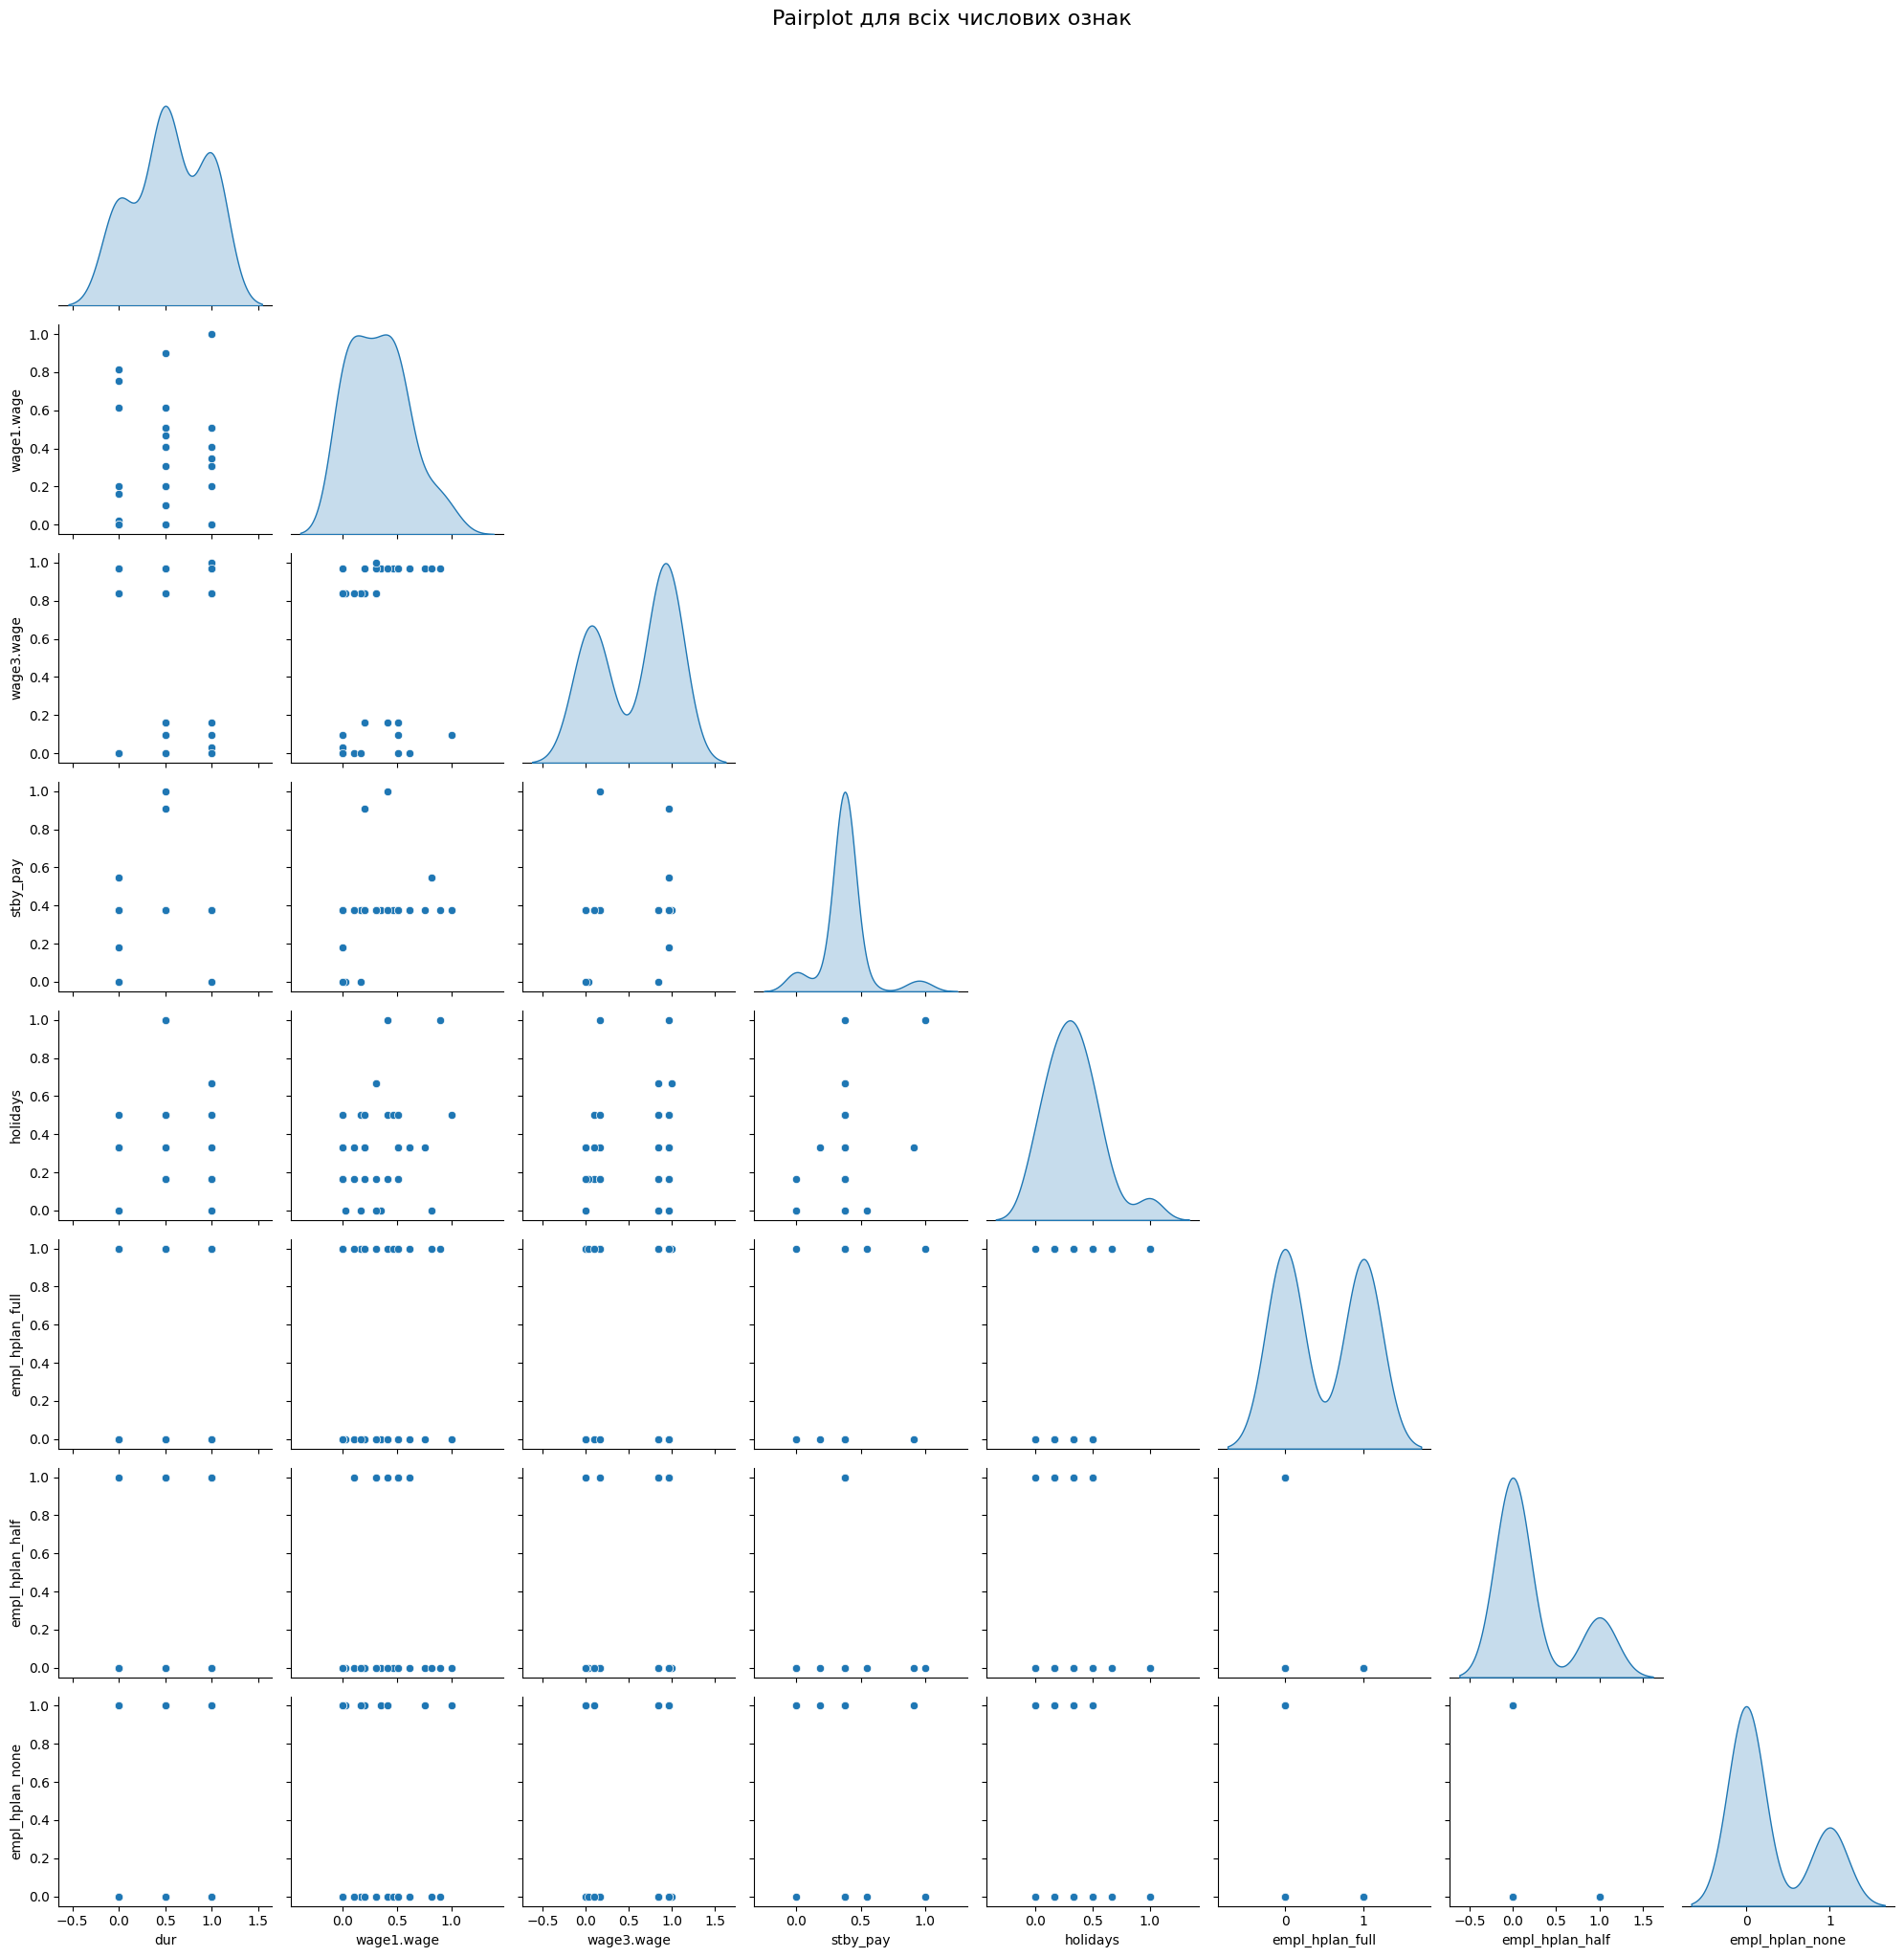

In [47]:
numeric_cols = df.select_dtypes(include=['int32', 'int64', 'float32', 'float64']).columns
sns.pairplot(df[numeric_cols], diag_kind="kde", corner=True)
plt.suptitle("Pairplot для всіх числових ознак", fontsize=16, y=1.02)
plt.tight_layout()
plt.show()

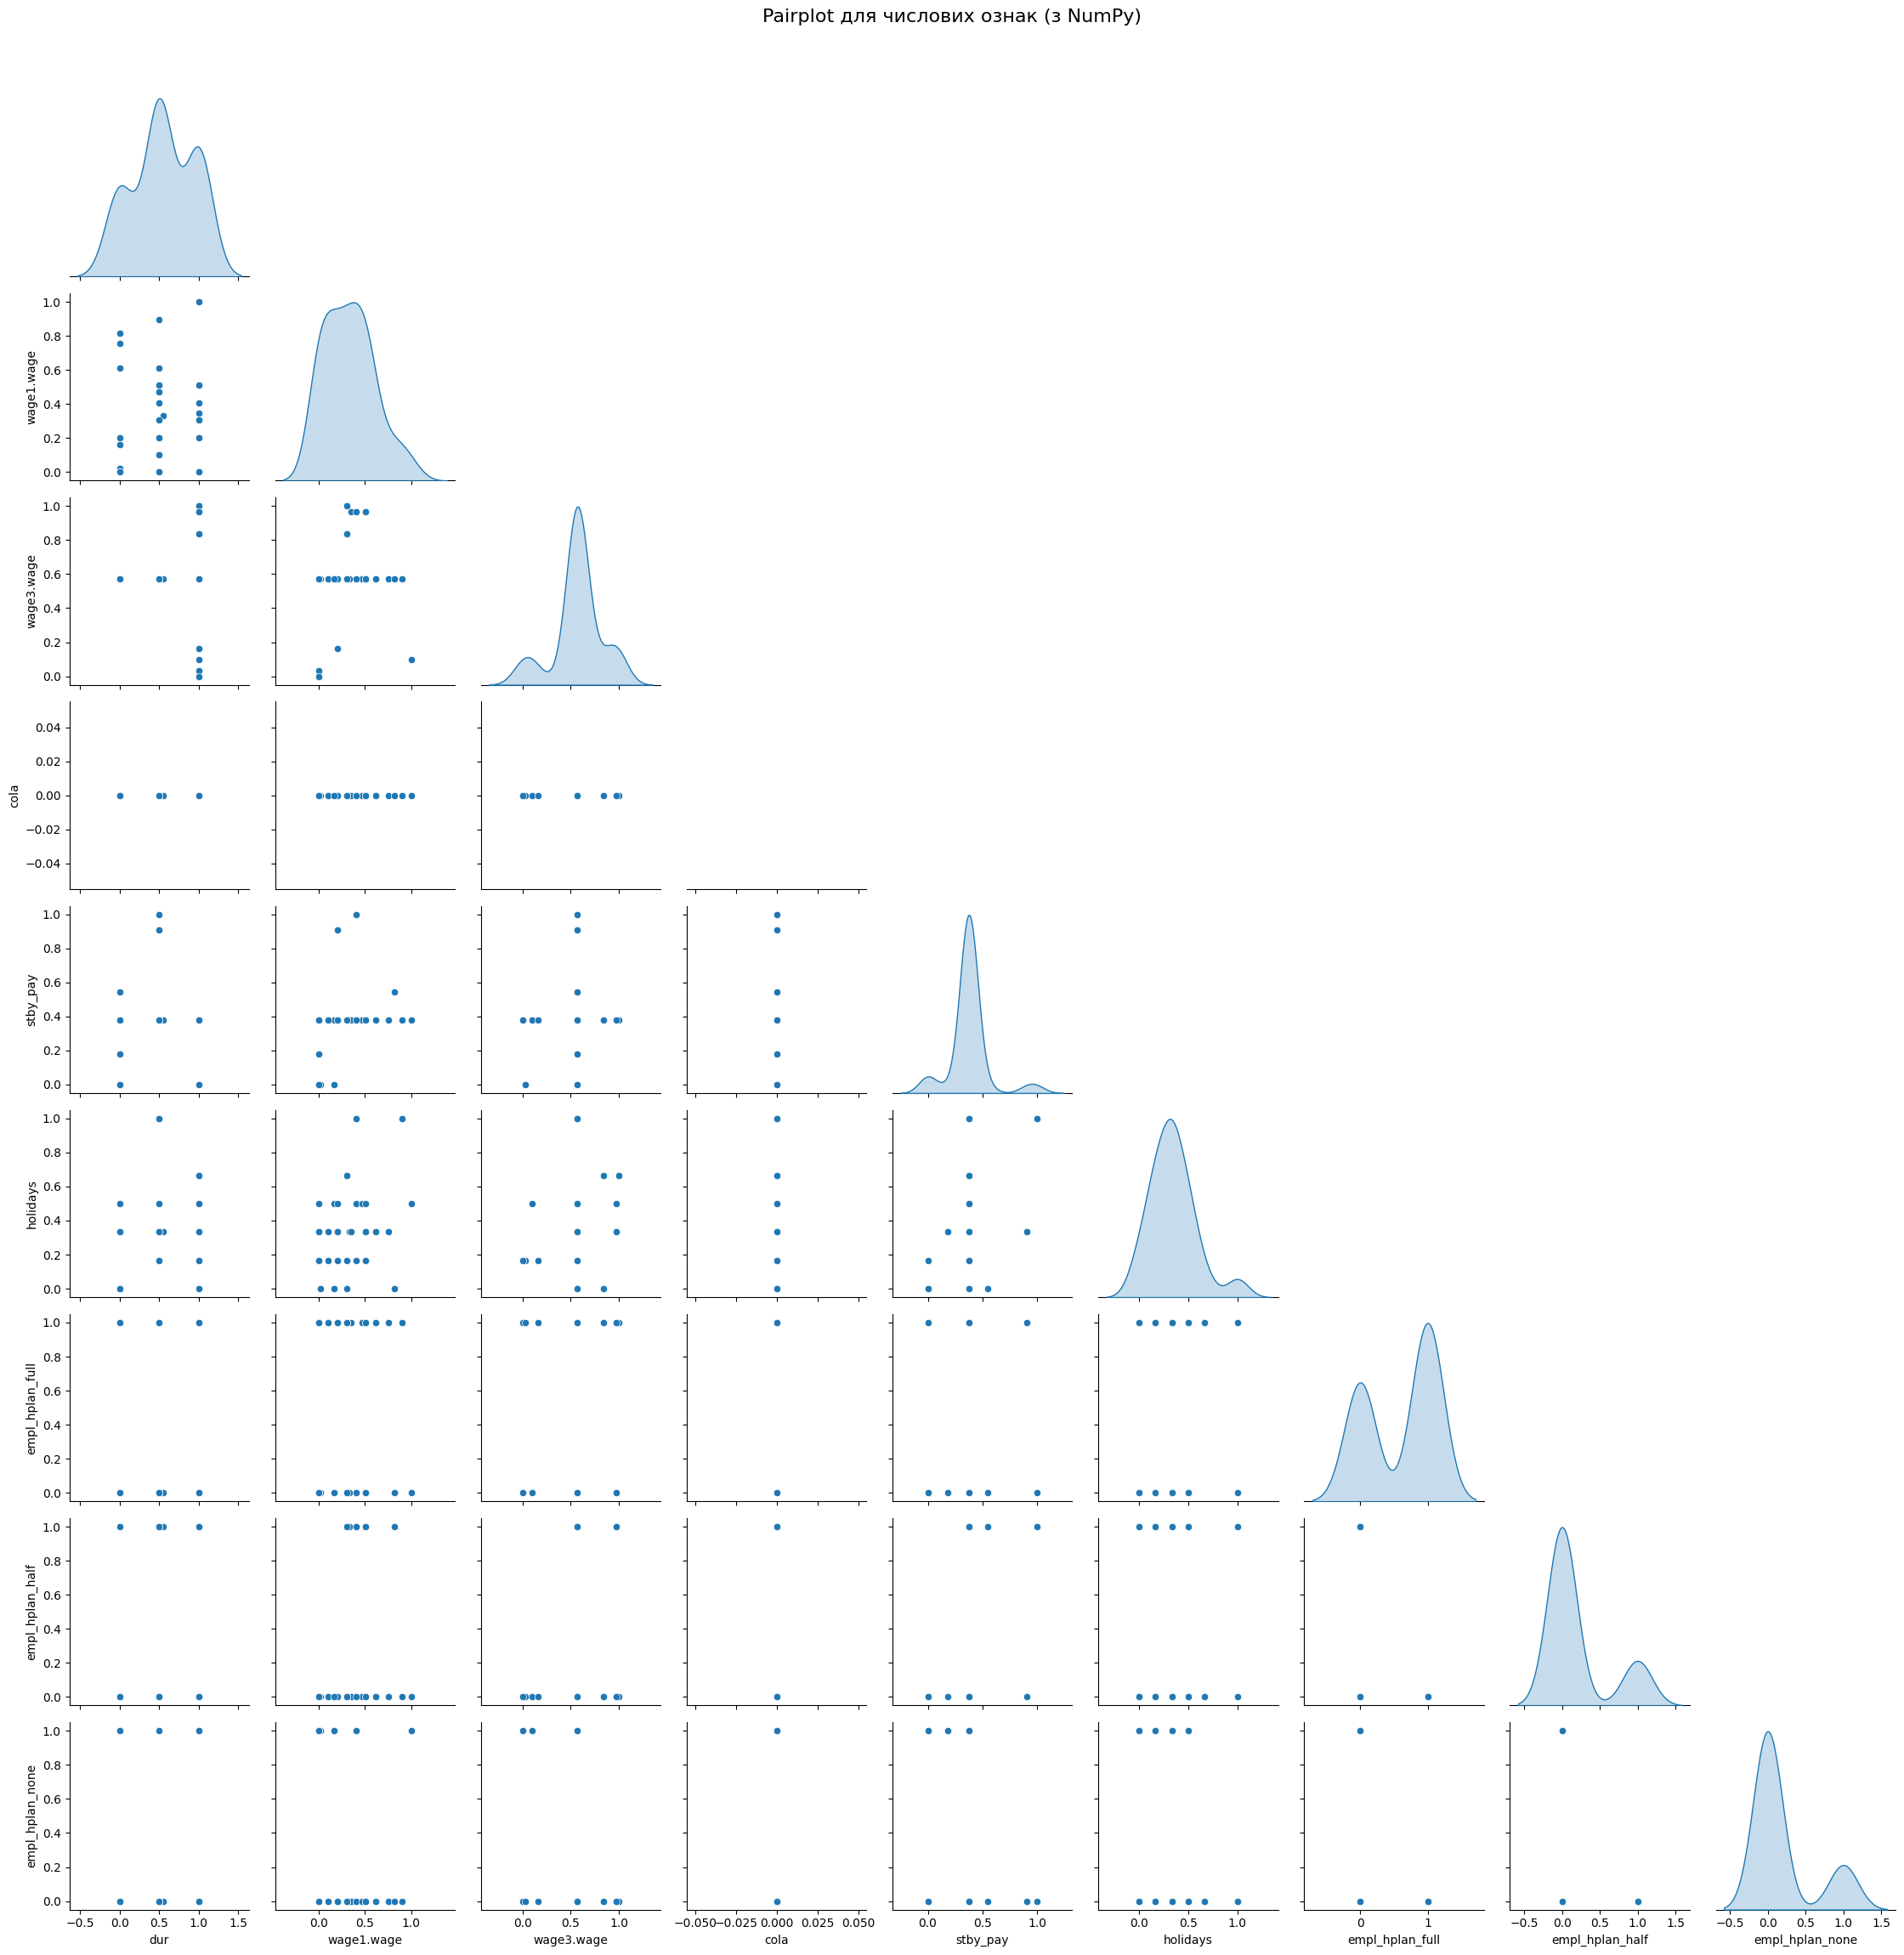

In [48]:
df_from_np = pd.DataFrame(data_encoded, columns=headers_encoded)
df_from_np = df_from_np.apply(pd.to_numeric, errors='ignore')
numeric_cols = df_from_np.select_dtypes(include=['int64', 'float64']).columns
sns.pairplot(df_from_np[numeric_cols], diag_kind="kde", corner=True)
plt.suptitle("Pairplot для числових ознак (з NumPy)", fontsize=16, y=1.02)
plt.tight_layout()
plt.show()
